### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
from funcs import matplotlib_imshow
from funcs import auto_canny

## Contours ([Docs]())

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis, object detection and recognition.

<img src='./imgs/contour_example.jpeg' height=500>

**Note:** A useful Resource for learning about Contours in OpenCv along with the OpenCV documentation might be [This One](https://bleedaiacademy.com/contour-detection-101-the-basics-pt1/).

- ### Finding Contours

In OpenCV, finding contours is like finding white object from black background. So remember, `object to be found should be white and background should be black.`

> The `cv.findContours(image, mode, method)` function

<u>Function Parameters</u>
- image: source image (an 8-bit single-channel image). Non-zero pixels are treated as 1's. Zero pixels remain 0's i.e, the image is treated as binary. **So, before finding contours, apply threshold or canny edge detection.**
- mode: contour retrieval mode. The available [retrieval modes](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71) are,
    - cv.RETR_EXTERNAL: retrieves only the extreme outer contours.
    - cv.RETR_LIST: retrieves all of the contours without establishing any hierarchical relationships.
    - cv.RETR_CCOMP: retrieves all of the contours and organizes them into a two-level hierarchy. At the top level, there are external boundaries of the components. At the second level, there are boundaries of the holes.
    - cv.RETR_TREE: retrieves all of the contours and reconstructs a full hierarchy of nested contours.
- method: contour approximation method. The available [contour approximation modes]() are,
    - cv.CHAIN_APPROX_NONE: all the boundary points are stored. 
    - cv.CHAIN_APPROX_SIMPLE: compresses horizontal, vertical, and diagonal segments and leaves only their end points.

**Returns:** (contours, hierarchy)

`Note:`  findContours() no longer modifies the source image.

In [4]:
# defining a function to find contours from images
# with some default preprocessing applied (Grayscale, GaussianBlur, Adaptive Gaussian Thresholding)
# objects represented as black and background as white needs to be inverted first before contour detection


def find_contours(
    img_path=None,
    black_obj_on_white_bg=True,
    mode=cv.RETR_CCOMP,
    method=cv.CHAIN_APPROX_SIMPLE,
):
    try:
        img_read = cv.imread(img_path)
    except:
        print("Provide a valid image path along with the image extension.")

    img = cv.cvtColor(img_read, cv.COLOR_BGR2GRAY)
    img_blurred = cv.GaussianBlur(img, (5, 5), sigmaX=0)

    # Thresholding/ applying Canny Edge is a must to have step in finding contours.
    # Without this step we may not find contours at all
    img_thresholded = cv.adaptiveThreshold(
        img_blurred, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 9, 2
    )
    # img_canny = auto_canny(img_blurred)
    if black_obj_on_white_bg:
        img_final = cv.bitwise_not(img_thresholded)
    else:
        img_final = img_thresholded

    contours, hierarchy = cv.findContours(img_final, mode, method)
    return img_read, img_final, contours, hierarchy

In [5]:
# finding contours of simple objects in an image
shape_img, img_used, shape_img_contours, shape_img_hierarchy = find_contours(
    "./imgs/simple_shapes.png", black_obj_on_white_bg=True, mode=cv.RETR_EXTERNAL
)

In [6]:
print(f"Total contours found = {len(shape_img_contours)}")

Total contours found = 25


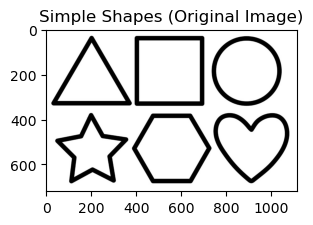

In [7]:
matplotlib_imshow("Simple Shapes (Original Image)", shape_img, 5)

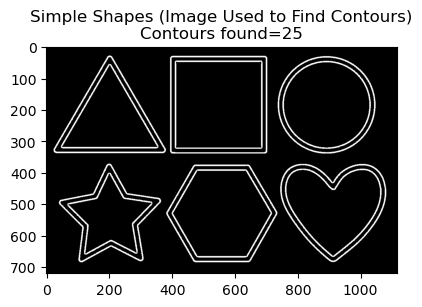

In [8]:
matplotlib_imshow(
    f"Simple Shapes (Image Used to Find Contours)\nContours found={len(shape_img_contours)}",
    img_used,
    7,
)
# no need to convert color space since matplotlib_imshow does that
# if we were to use plt.imshow() we need to convert color space for correct representation of the colors

- ### Drawing Contours

> The `cv.drawContours(image, contours, contourIdx, color, thickness)` function

<u>Function Parameters</u>
- image: image to draw contours on.
- contours: all the input contours.
- contourIdx: index of the contour to be drawn. If it is negative, all the contours are drawn.
- color: color of the drawn contours.
- thickness: thickness of the lines contours are drawn with.

**`Note:`** Draws on the source image i.e, modifies the source image inplace. So be careful.

In [9]:
def get_canvas(shape, color_code=(80, 80, 80)):
    return np.full(shape, fill_value=color_code, dtype=np.uint8)

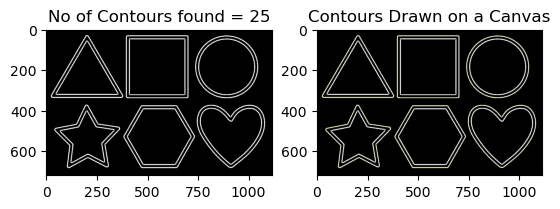

In [10]:
plt.subplot(1, 2, 1).imshow(cv.cvtColor(img_used, cv.COLOR_BGR2RGB)), plt.title(
    f"No of Contours found = {len(shape_img_contours)}"
)

plt.subplot(1, 2, 2).imshow(
    cv.drawContours(
        cv.cvtColor(img_used, cv.COLOR_BGR2RGB),
        shape_img_contours,
        -1,
        (200, 200, 0),
        thickness=1,
    )
), plt.title("Contours Drawn on a Canvas")

plt.show()

In [11]:
# a function to draw all the detected contours one by one with 0.5 second pause after each one is drawn
def draw_all_contours_one_by_one(
    canvas_shape,
    contours,
    idx=-1,
    color=(200, 0, 0),
    thickness=1,
    time_to_pause_in_between=0.5,
):
    # to draw every contour on the same canvas
    # canvas = get_canvas(canvas_shape)
    for i, cnt in enumerate(contours):
        # to draw each one in a completely blank canvas
        canvas = get_canvas(canvas_shape)
        cv.drawContours(canvas, [cnt], idx, color, thickness)
        plt.imshow(canvas)
        plt.title(f"Contour = {i}")
        plt.pause(time_to_pause_in_between)
        plt.show()

In [12]:
# %matplotlib qt
# draw_all_contours_one_by_one(shape_img.shape, shape_img_contours)

> Use `cv.drawContours(image, [contour], -1, color, thickness=-1)` to Draw Filled Contour